In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.precision',3)
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv',index_col="id")
test = pd.read_csv('test.csv',index_col="id")
print("shape of training data:", train.shape)
print("shape of test data", test.shape)

shape of training data: (19219, 34)
shape of test data (12814, 27)


Inspecting data

In [3]:
# No missing_values in the training data
train.isnull().sum().to_frame().transpose()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# No missing_values in the test data
test.isnull().sum().to_frame().transpose()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
col_unique_train =[]
for col in train.columns:
    n_unique_train = len(np.unique(train[col]))
    col_unique_train.append([col, n_unique_train , train[col].dtype])

print(col_unique_train)

col_unique_test = []
for col in test.columns:
    n_unique_test = len(np.unique(test[col]))
    col_unique_test.append([col, n_unique_test, test[col].dtype])

print(col_unique_test)

[['X_Minimum', 1191, dtype('int64')], ['X_Maximum', 1259, dtype('int64')], ['Y_Minimum', 3345, dtype('int64')], ['Y_Maximum', 3341, dtype('int64')], ['Pixels_Areas', 1154, dtype('int64')], ['X_Perimeter', 460, dtype('int64')], ['Y_Perimeter', 331, dtype('int64')], ['Sum_of_Luminosity', 2595, dtype('int64')], ['Minimum_of_Luminosity', 162, dtype('int64')], ['Maximum_of_Luminosity', 98, dtype('int64')], ['Length_of_Conveyer', 99, dtype('int64')], ['TypeOfSteel_A300', 2, dtype('int64')], ['TypeOfSteel_A400', 2, dtype('int64')], ['Steel_Plate_Thickness', 27, dtype('int64')], ['Edges_Index', 1849, dtype('float64')], ['Empty_Index', 1748, dtype('float64')], ['Square_Index', 1118, dtype('float64')], ['Outside_X_Index', 525, dtype('float64')], ['Edges_X_Index', 1102, dtype('float64')], ['Edges_Y_Index', 900, dtype('float64')], ['Outside_Global_Index', 4, dtype('float64')], ['LogOfAreas', 1072, dtype('float64')], ['Log_X_Index', 206, dtype('float64')], ['Log_Y_Index', 241, dtype('float64')], ['

In [6]:
category_mapping = {'TypeOfSteel_A300' : 'category',
                    'TypeOfSteel_A400' : 'category',
                    'Outside_Global_Index': 'category'}

#converting datatype of categorical columns
train = train.astype(category_mapping)
test = test.astype(category_mapping)

In [7]:
#separating features and targets
features = train.columns.to_list()[:-7]
targets = [ i for i in train.columns if i not in features]
pd.DataFrame(features).transpose()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas


Explore numerical features

In [8]:
num_features = train.select_dtypes(exclude='category').columns.to_list()[:-7]
cat_features = train.select_dtypes(include='category').columns.to_list()
features = num_features + cat_features
features

['X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Outside_Global_Index']

In [9]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler, FunctionTransformer
scaler = StandardScaler()
log_transformer = FunctionTransformer(np.log1p)
# train[num_features] = scaler.fit_transform(train[num_features])
# test[num_features] = scaler.fit_transform(test[num_features])

In [10]:
log_transform_cols = [
    'X_Minimum',
    'X_Maximum',
    'Y_Minimum',
    'Y_Maximum',
    'Pixels_Areas',
    'X_Perimeter',
    'Y_Perimeter',
    'Sum_of_Luminosity',
    'Outside_X_Index']

scale_cols = ['Minimum_of_Luminosity',
    'Maximum_of_Luminosity',
    'Length_of_Conveyer',
    'Steel_Plate_Thickness',
    'Edges_Index',
    'Empty_Index',
    'Square_Index',
    'Edges_X_Index',
    'Edges_Y_Index',
    'LogOfAreas',
    'Log_X_Index',
    'Log_Y_Index',
    'Orientation_Index',
    'Luminosity_Index',
    'SigmoidOfAreas']

train[log_transform_cols] = log_transformer.fit_transform(train[log_transform_cols])
test[log_transform_cols] = log_transformer.fit_transform(test[log_transform_cols])
train[scale_cols] = scaler.fit_transform(train[scale_cols])
test[scale_cols] = scaler.fit_transform(test[scale_cols])




Exploring targets

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

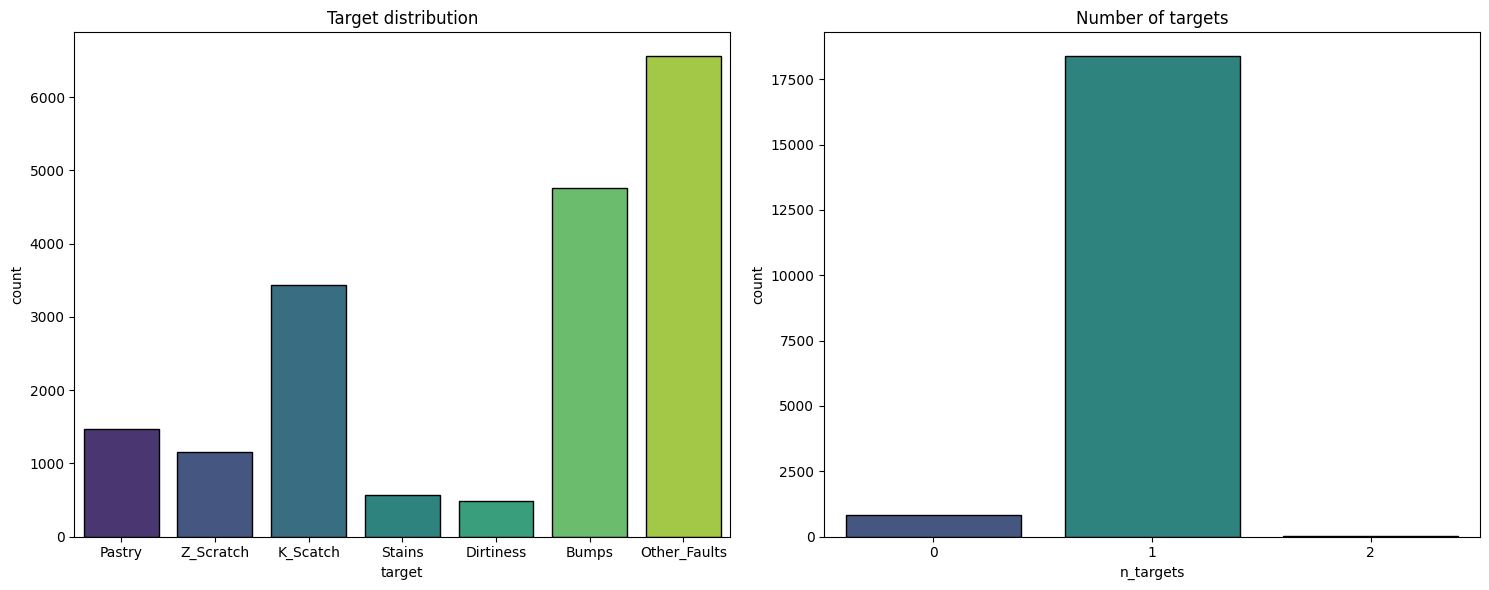

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

target_counts = train[targets].sum().to_frame().reset_index().rename(columns={'index':'target',0:'count'})
target_unique = train[targets].sum(axis='columns').value_counts().sort_index().to_frame().reset_index().rename(columns={'index':'n_targets',0:'count'})

sns.barplot(data=target_counts, x='target', y='count', ax=ax[0], palette='viridis', edgecolor='black')
sns.barplot(data=target_unique, x='n_targets', y='count', ax=ax[1], palette='viridis', edgecolor='black')

ax[0].set_title('Target distribution')
ax[1].set_title('Number of targets')

plt.tight_layout()

record where defect > 1 is very less, hence we are dropping these rows.
since most record has either 0 or 1 defect . this can be treated as a mutli class problem rather than multi label problem

In [13]:
train = train.loc[train[targets].sum(axis='columns') <=1]

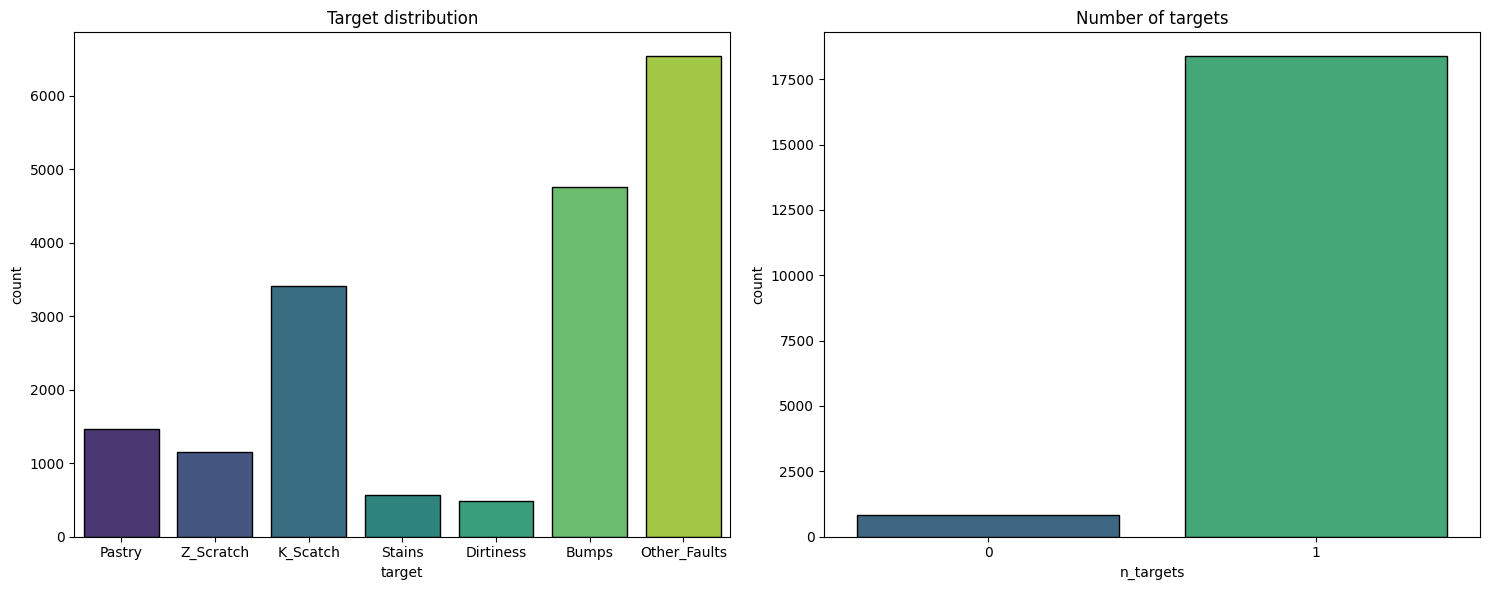

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

target_counts = train[targets].sum().to_frame().reset_index().rename(columns={'index':'target',0:'count'})
target_unique = train[targets].sum(axis='columns').value_counts().sort_index().to_frame().reset_index().rename(columns={'index':'n_targets',0:'count'})

sns.barplot(data=target_counts, x='target', y='count', ax=ax[0], palette='viridis', edgecolor='black')
sns.barplot(data=target_unique, x='n_targets', y='count', ax=ax[1], palette='viridis', edgecolor='black')

ax[0].set_title('Target distribution')
ax[1].set_title('Number of targets')

plt.tight_layout()

In [15]:
target_matrix = train[targets]
target_matrix.shape


(19198, 7)

In [16]:
train = train.drop(targets,axis='columns')
train

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
id,,,,,,,,,,,,,,,,,,,,,
0,6.372,6.382,13.721,13.721,2.833,2.197,1.792,7.730,0.979,0.800,...,0.006,1.732,0.762,0.0,-1.669,-0.875,-1.703,-1.236,1.063,-1.295
1,6.696,6.706,13.499,13.499,6.073,3.045,4.007,10.703,-0.514,-1.243,...,0.004,-1.640,0.762,1.0,0.214,-1.142,0.845,1.311,-1.341,1.135
2,3.689,5.263,14.609,14.609,9.340,6.560,6.043,14.087,-1.938,0.870,...,0.102,-1.702,-2.018,0.0,2.081,1.852,2.021,-0.232,0.365,1.289
3,6.662,6.672,15.025,15.025,5.352,2.833,3.401,8.072,1.014,0.377,...,0.004,-1.078,0.450,1.0,-0.199,-1.142,0.103,1.156,0.816,-0.510
4,7.340,7.353,13.335,13.335,6.258,4.290,4.220,10.784,-0.098,-1.243,...,0.019,-1.818,0.699,1.0,0.389,0.219,1.211,1.667,-0.890,1.288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,6.620,6.631,11.872,11.872,2.890,1.609,1.609,7.693,1.291,0.800,...,0.004,1.732,-0.143,0.0,-1.634,-1.142,-1.942,-0.504,1.186,-0.848
19215,6.585,6.601,14.727,14.727,5.447,2.890,3.296,10.209,0.666,0.307,...,0.006,0.533,0.407,1.0,-0.144,-0.580,0.062,1.270,0.328,-0.103
19216,1.946,3.466,14.272,14.272,6.661,4.745,4.595,11.172,-1.521,-2.441,...,0.020,-1.927,0.560,1.0,0.550,0.254,1.182,1.372,-2.409,1.288


In [17]:
#matrix multiplicatio 
# A = [19198x7] B = [7X1] 
# np.arrange(target_matrix.shape[1]+1) gives = [1, 2, 3, 4, 5, 6, 7]) ---> we are converting into a multi class classification
target = target_matrix@(np.arange(target_matrix.shape[1]) + 1) 
target

id
0        4
1        7
2        3
3        3
4        7
        ..
19214    4
19215    7
19216    1
19217    7
19218    6
Length: 19198, dtype: int64

In [18]:
targets

['Pastry',
 'Z_Scratch',
 'K_Scatch',
 'Stains',
 'Dirtiness',
 'Bumps',
 'Other_Faults']

In [19]:
X = train[features]
y = target


In [20]:
test = test[features]

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19198 entries, 0 to 19218
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   X_Minimum              19198 non-null  float64 
 1   X_Maximum              19198 non-null  float64 
 2   Y_Minimum              19198 non-null  float64 
 3   Y_Maximum              19198 non-null  float64 
 4   Pixels_Areas           19198 non-null  float64 
 5   X_Perimeter            19198 non-null  float64 
 6   Y_Perimeter            19198 non-null  float64 
 7   Sum_of_Luminosity      19198 non-null  float64 
 8   Minimum_of_Luminosity  19198 non-null  float64 
 9   Maximum_of_Luminosity  19198 non-null  float64 
 10  Length_of_Conveyer     19198 non-null  float64 
 11  Steel_Plate_Thickness  19198 non-null  float64 
 12  Edges_Index            19198 non-null  float64 
 13  Empty_Index            19198 non-null  float64 
 14  Square_Index           19198 non-null  floa

In [22]:
category_mapping = {'TypeOfSteel_A300' : 'int64',
                    'TypeOfSteel_A400' : 'int64',
                    'Outside_Global_Index': 'int64'}

# X.TypeOfSteel_A300 = X.TypeOfSteel_A300.astype('int64')
# X.TypeOfSteel_A400 = X.TypeOfSteel_A400.astype('int64')
# X.Outside_Global_Index = X.Outside_Global_Index.astype('int64')


In [23]:

X = X.astype(category_mapping)
test = test.astype(category_mapping)

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19198 entries, 0 to 19218
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              19198 non-null  float64
 1   X_Maximum              19198 non-null  float64
 2   Y_Minimum              19198 non-null  float64
 3   Y_Maximum              19198 non-null  float64
 4   Pixels_Areas           19198 non-null  float64
 5   X_Perimeter            19198 non-null  float64
 6   Y_Perimeter            19198 non-null  float64
 7   Sum_of_Luminosity      19198 non-null  float64
 8   Minimum_of_Luminosity  19198 non-null  float64
 9   Maximum_of_Luminosity  19198 non-null  float64
 10  Length_of_Conveyer     19198 non-null  float64
 11  Steel_Plate_Thickness  19198 non-null  float64
 12  Edges_Index            19198 non-null  float64
 13  Empty_Index            19198 non-null  float64
 14  Square_Index           19198 non-null  float64
 15  Outside

In [24]:
print(X.shape)


(19198, 27)


In [25]:
print(test.head())
print(test.shape)

       X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter   
id                                                                             
19219      6.924      6.941     15.157     15.157         6.492        3.178  \
19220      7.137      7.148     12.948     12.948         5.916        3.296   
19221      7.215      7.225     11.676     11.676         5.670        3.611   
19222      5.069      5.130     12.356     12.356         4.394        2.398   
19223      6.328      6.385     13.207     13.207         4.949        2.996   

       Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity   
id                                                             
19219        3.850             11.041                 -0.611  \
19220        3.367             10.579                  0.260   
19221        3.497             10.288                  0.573   
19222        2.485              9.058                  0.782   
19223        2.773              9.650                  

Modelling

In [26]:
from xgboost import XGBClassifier

# xgb = XGBClassifier()
# xgb.fit(X,y)
# df= xgb.predict_proba(test)    # 12814 x 8 records where 0 being no defect at all for the gicen record
# #output is [n_samples,n_class] where with probability of each data of being a given class

In [27]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import optuna
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score



In [28]:
# def objective(trial):
#     params = {
#         'objective': 'binary:logistic',
#         'eval_metric': 'merror',
#         'booster': 'gbtree',
#         'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
#         'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
#         'max_depth': trial.suggest_int('max_depth', 1, 9),
#         'eta': trial.suggest_loguniform('eta', 1e-8, 1.0),
#         'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
#         'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])


#         }
#     model = XGBClassifier(**params)
#     model.fit(X,y,eval_set=[(X_valid,y_valid)], early_stopping_rounds=100, verbose=False)
#     y_pred = model.predict(X_valid)
#     accuracy = accuracy_score(y_valid,y_pred)

#     return 1.0-accuracy


In [29]:
def auc_score(estimator, X, y):
    y_prob = estimator.predict_proba(X)
    return roc_auc_score(y, y_prob, multi_class="ovr")


def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5, log=True),
        'gamma': trial.suggest_float('gamma', 1e-3, 1, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 1, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 1, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        "min_child_weight": trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1, log=True),
        'random_state': trial.suggest_int('random_state', 0, 1000),
    }

    model = XGBClassifier(objective='binary:logistic',**params)
    score = cross_val_score(model, X, y, scoring=auc_score, cv=5).mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Best trial:', study.best_trial.params)
print('Best score:', study.best_value)

[I 2024-03-18 21:18:37,631] A new study created in memory with name: no-name-25b200e7-16b4-4bed-b88f-6b0dda4ab031
[I 2024-03-18 21:18:50,150] Trial 0 finished with value: 0.8498973366758367 and parameters: {'n_estimators': 104, 'learning_rate': 0.18053554839170674, 'gamma': 0.0021478803708549223, 'reg_alpha': 0.0021813566647710895, 'reg_lambda': 0.08766194684293449, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.7773667526975077, 'colsample_bytree': 0.9310488524737617, 'random_state': 63}. Best is trial 0 with value: 0.8498973366758367.
[I 2024-03-18 21:19:34,551] Trial 1 finished with value: 0.8586866450642313 and parameters: {'n_estimators': 290, 'learning_rate': 0.024598448473450447, 'gamma': 0.3186385153244893, 'reg_alpha': 0.08112075665272228, 'reg_lambda': 0.21161757071631082, 'max_depth': 9, 'min_child_weight': 8, 'subsample': 0.8649361727648998, 'colsample_bytree': 0.5730553684439785, 'random_state': 521}. Best is trial 1 with value: 0.8586866450642313.
[I 2024-03-18 21:

Best trial: {'n_estimators': 378, 'learning_rate': 0.028786724994894645, 'gamma': 0.02904829197018061, 'reg_alpha': 0.18723112291201502, 'reg_lambda': 0.11959644235865553, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.6697251784133099, 'colsample_bytree': 0.554205101164508, 'random_state': 565}
Best score: 0.8621229304181967


In [30]:
#a = {'n_estimators': 642, 'learning_rate': 0.011401406811339021, 'gamma': 0.03019990623254004, 'reg_alpha': 0.326231409485988, 'reg_lambda': 0.061503595803754064, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.7438314539513564, 'colsample_bytree': 0.5660718425034847, 'random_state': 683}

In [36]:
# Perform hyperparameter optimization with Optuna
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

a = study.best_params
# # Print the best hyperparameters found
# print('Best hyperparameters:', a)


In [37]:
model = XGBClassifier(objective='binary:logistic',**a)
model.fit(X,y)
df = model.predict_proba(test)

In [38]:
df = pd.DataFrame(df[:,1:])

In [39]:
df = df.rename(
    columns = {
        0: 'Pastry',
        1: 'Z_Scratch',
        2: 'K_Scatch',
        3: 'Stains',
        4: 'Dirtiness',
        5: 'Bumps',
        6: 'Other_Faults'
    }
)
df.index = test.index
df

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,
19219,4.392e-01,1.998e-03,0.004,4.875e-04,1.366e-02,0.163,0.336
19220,2.062e-01,1.248e-02,0.014,6.448e-04,1.581e-01,0.146,0.417
19221,3.168e-03,5.106e-02,0.045,1.247e-03,9.773e-03,0.314,0.495
19222,1.696e-01,3.439e-03,0.001,1.940e-03,1.440e-02,0.335,0.434
19223,3.820e-03,3.161e-03,0.001,3.291e-03,9.335e-03,0.550,0.372
...,...,...,...,...,...,...,...
32028,6.727e-02,1.825e-01,0.004,5.721e-04,2.782e-02,0.210,0.403
32029,1.515e-01,7.349e-03,0.031,1.501e-02,1.471e-01,0.193,0.396
32030,6.267e-04,6.655e-04,0.927,2.581e-04,7.337e-04,0.001,0.055


In [35]:
df.to_csv('TEST_123.csv') 
#------0.89320